In [1]:
# Load your data
import sys

from rich.jupyter import display

from src import (load_csv_finantial_news_data,classify_sentiment   , clean_news_dates,filter_news_by_ticker, aggregate_sentiment_by_ticker_and_date,calculate_lagged_correlation,calculate_correlation)

sys.path.append('../../src') # append src path

data_path = '../../data/news/raw_analyst_ratings.csv'
stock_news = load_csv_finantial_news_data(data_path)
stock_news.head()

# Apply sentiment classification
# news_with_sentiment = classify_sentiment(stock_news, text_column='headline')
#
# # Check results
# print(news_with_sentiment[['headline', 'vader_sentiment', 'vader_compound', 'textblob_polarity']].head())



Data loaded successfully.
DataFrame shape: (1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock,Ticker
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,A


In [2]:
import sys

from rich.jupyter import display

from src import (load_csv_finantial_news_data,classify_sentiment   , clean_news_dates)

sys.path.append('../../src') # append src path
stock_news_clean = clean_news_dates(stock_news, date_col='date', new_col='clean_date')
stock_news_clean.head()


/Users/worash/Desktop/tenx/predict-price-move-with-sentment/src/utils/finantial_news_data_loader.py:70: UserWarning: Removed 1351341 invalid dates
  warnings.warn(f"Removed {invalid_mask.sum()} invalid dates", UserWarning)


,Unnamed: 0,headline,url,publisher,date,stock,Ticker,clean_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,A,2020-06-05 10:30:54
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,A,2020-06-03 10:45:20
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,A,2020-05-26 04:30:07
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,A,2020-05-22 12:45:06
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,A,2020-05-22 11:38:59


### load stock historical date  and clean  stock data date


### analyze  and classify news  sentiment

In [3]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META']

# Filter the DataFrame by the tickers

filtered_stock_news= filter_news_by_ticker(stock_news_clean, tickers, ticker_col='Ticker')

# Count the number of news items per ticker
news_counts = filtered_stock_news['Ticker'].value_counts()

print(news_counts)


Ticker
AAPL    10
AMZN    10
GOOG    10
NVDA    10
TSLA    10
Name: count, dtype: int64


### classify sentiment  for each filtered stock news

In [4]:

news_with_sentiment = classify_sentiment(filtered_stock_news, text_column='headline')

# Preview the results
news_with_sentiment.head(10)


,Unnamed: 0,headline,url,publisher,date,stock,Ticker,clean_date,vader_scores,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment,textblob_polarity,textblob_subjectivity,is_positive,is_negative,is_neutral
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL,AAPL,2020-06-10 11:33:26,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'comp...",0.5574,0.0,0.705,0.295,positive,0.433333,0.733333,1,0,0
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL,AAPL,2020-06-10 08:14:08,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000,neutral,0.000000,0.000000,0,0,1
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL,AAPL,2020-06-10 07:53:47,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.2023,0.0,0.893,0.107,positive,0.500000,0.500000,1,0,0
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL,AAPL,2020-06-10 07:19:25,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000,neutral,0.000000,0.000000,0,0,1
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL,AAPL,2020-06-10 06:27:11,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.3818,0.0,0.852,0.148,positive,0.000000,0.000000,1,0,0
6685,7125,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 00:52:01-04:00,AAPL,AAPL,2020-06-10 00:52:01,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.0516,0.0,0.882,0.118,positive,0.068182,0.277273,1,0,0
6686,7126,Why Apple's Stock Is Trading Higher Today,https://www.benzinga.com/news/20/06/16215446/w...,Tanzeel Akhtar,2020-06-09 15:14:07-04:00,AAPL,AAPL,2020-06-09 15:14:07,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000,neutral,0.250000,0.500000,0,0,1
6687,7127,Apple Could Announce In-House Chips For Macs A...,https://www.benzinga.com/news/20/06/16214115/a...,Shanthi Rexaline,2020-06-09 13:58:46-04:00,AAPL,AAPL,2020-06-09 13:58:46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000,neutral,0.000000,0.000000,0,0,1
6688,7128,Apple shares are trading higher despite market...,https://www.benzinga.com/wiim/20/06/16214320/a...,Benzinga Newsdesk,2020-06-09 12:41:02-04:00,AAPL,AAPL,2020-06-09 12:41:02,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.5472,0.0,0.847,0.153,positive,0.050000,0.433333,1,0,0
6689,7129,"Sonos Shares Spike To Session High, Now Up 9.5...",https://www.benzinga.com/m-a/20/06/16213381/so...,Benzinga Newsdesk,2020-06-09 11:11:34-04:00,AAPL,AAPL,2020-06-09 11:11:34,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4404,0.0,0.865,0.135,positive,0.053333,0.313333,1,0,0


### aggreggete sentiment by same date

In [5]:

ticker_daily_sentiment = aggregate_sentiment_by_ticker_and_date(
    news_with_sentiment,
    date_col='clean_date',
    ticker_col='Ticker'  # Column name containing stock tickers
)

# Filter for a specific ticker
ticker_sentiment = ticker_daily_sentiment[ticker_daily_sentiment['Ticker'] == 'TSLA']
ticker_sentiment.head(10)


,Ticker,clean_date,vader_mean,vader_median,textblob_mean,total_articles,positive_articles,negative_articles,neutral_articles,positive_pct,negative_pct,neutral_pct,day_of_week,week_number,month
40,TSLA,2020-06-10 07:55:49,0.2960,0.2960,0.250000,1,1,0,0,100.0,0.0,0.0,Wednesday,24,June
41,TSLA,2020-06-10 08:14:33,0.0000,0.0000,0.000000,1,0,0,1,0.0,0.0,100.0,Wednesday,24,June
42,TSLA,2020-06-10 08:43:13,0.0000,0.0000,0.000000,1,0,0,1,0.0,0.0,100.0,Wednesday,24,June
43,TSLA,2020-06-10 09:00:24,0.0000,0.0000,-0.400000,1,0,0,1,0.0,0.0,100.0,Wednesday,24,June
44,TSLA,2020-06-10 09:58:54,0.2960,0.2960,0.148182,1,1,0,0,100.0,0.0,0.0,Wednesday,24,June
45,TSLA,2020-06-10 10:15:07,0.0000,0.0000,0.000000,1,0,0,1,0.0,0.0,100.0,Wednesday,24,June
46,TSLA,2020-06-10 11:33:18,0.0000,0.0000,0.000000,1,0,0,1,0.0,0.0,100.0,Wednesday,24,June
47,TSLA,2020-06-10 12:41:58,0.4019,0.4019,0.000000,1,1,0,0,100.0,0.0,0.0,Wednesday,24,June
48,TSLA,2020-06-10 15:08:09,0.8176,0.8176,0.183333,1,1,0,0,100.0,0.0,0.0,Wednesday,24,June
49,TSLA,2020-06-10 17:02:47,0.5574,0.5574,0.193636,1,1,0,0,100.0,0.0,0.0,Wednesday,24,June


In [6]:
import sys
import warnings
import pandas as pd
import numpy as np

sys.path.append('../../src')

from src import DataLoader
from src import FinancialMetrics

try:
    # Initialize data loader and metrics calculator
    yfinance_data_loader = DataLoader()
    financial_metrics = FinancialMetrics()

    # List of tickers
    tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META']

    # Load data for multiple stocks
    stock_data = yfinance_data_loader.load_multiple_stocks(tickers)

    # Display sample of calculated financial metrics
    for ticker in tickers:
        try:
            ticker_df = stock_data[ticker].copy()
            financial_metrics_data = financial_metrics.calculate_returns(ticker_df, price_col='Close')
            # 2. Drop rows with NaN values
            financial_metrics_data.dropna(subset=['Daily_Return', 'Log_Return', 'Cumulative_Return'], inplace=True)

            print(f"\nFinancial metrics data for {ticker}:")
            print(financial_metrics_data[['clean_date', 'Close', 'Daily_Return', 'Log_Return', 'Cumulative_Return']].head(3))

        except Exception as e:
            print(f"Failed to calculate returns for {ticker}: {str(e)}")

except Exception as e:
    print(f"Data loading failed: {str(e)}")


/Users/worash/Desktop/tenx/predict-price-move-with-sentment/src/utils/yfinance_data_utils.py:124: UserWarning: Zero volume entries found for AAPL
  warnings.warn(f"Zero volume entries found for {ticker}")


Successfully loaded and cleaned 10998 rows for AAPL
Successfully loaded and cleaned 9672 rows for MSFT
Successfully loaded and cleaned 5020 rows for GOOG
Successfully loaded and cleaned 6846 rows for AMZN
Successfully loaded and cleaned 6421 rows for NVDA
Successfully loaded and cleaned 3545 rows for TSLA
Successfully loaded and cleaned 2926 rows for META

Financial metrics data for AAPL:
           clean_date     Close  Daily_Return  Log_Return  Cumulative_Return
Date                                                                        
1980-12-15 1980-12-15  0.121652     -0.052171   -0.053581          -0.052171
1980-12-16 1980-12-16  0.112723     -0.073398   -0.076231          -0.121739
1980-12-17 1980-12-17  0.115513      0.024751    0.024450          -0.100002

Financial metrics data for MSFT:
           clean_date     Close  Daily_Return  Log_Return  Cumulative_Return
Date                                                                        
1986-03-14 1986-03-14  0.100694    

###  merge news sentiment data with stock returns


AAPL Correlation between Daily Returns and Sentiment: 0.103


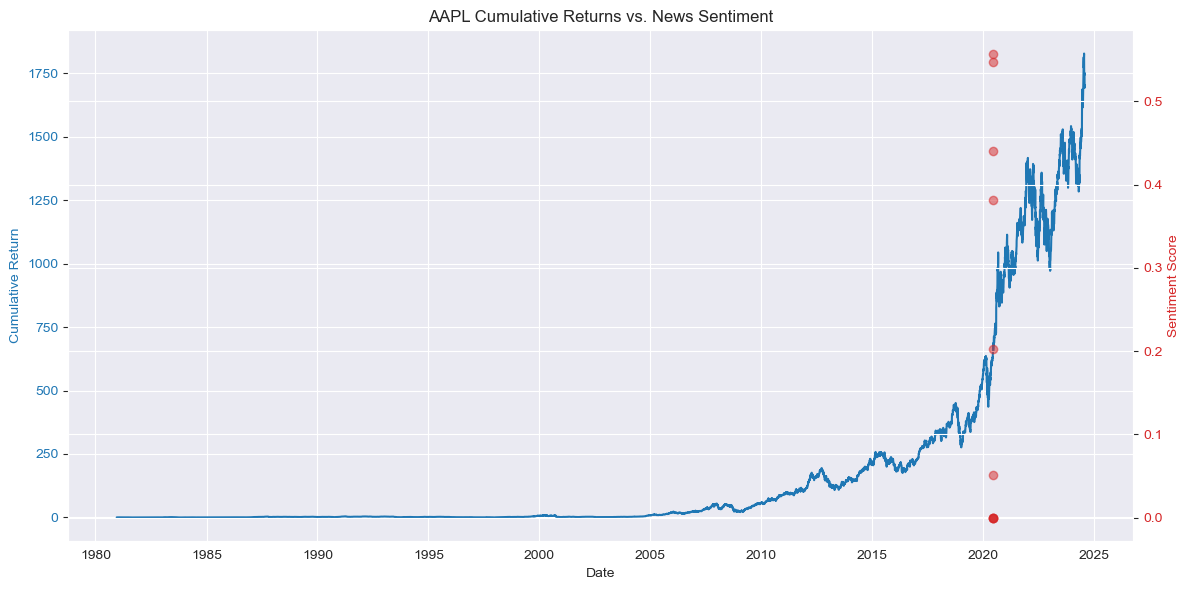


MSFT Correlation between Daily Returns and Sentiment: nan


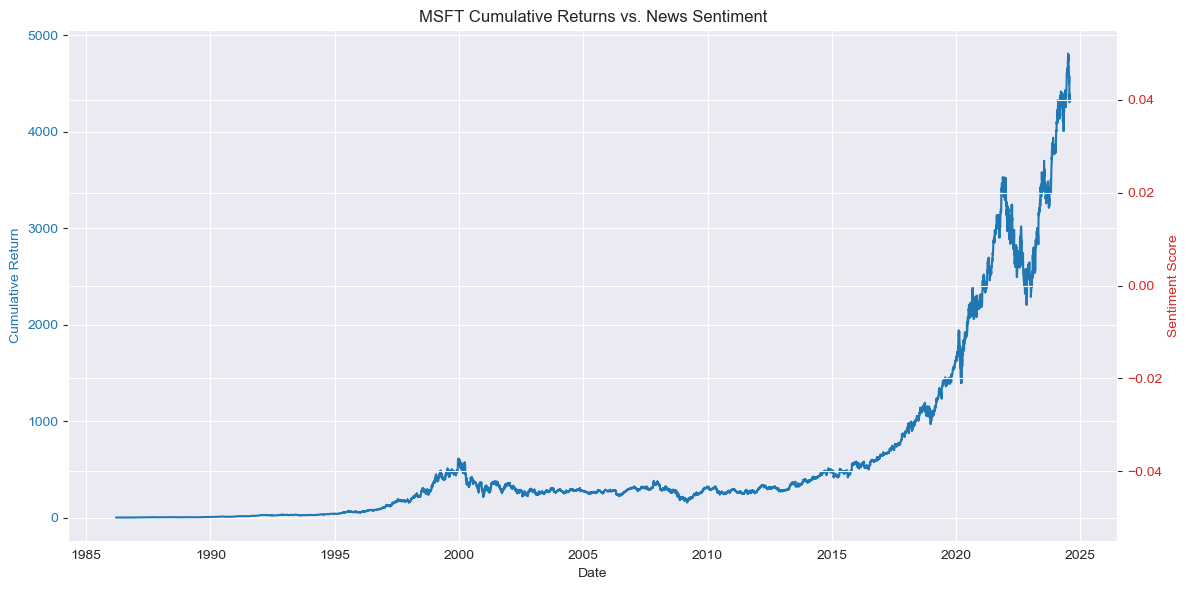


GOOG Correlation between Daily Returns and Sentiment: -0.392


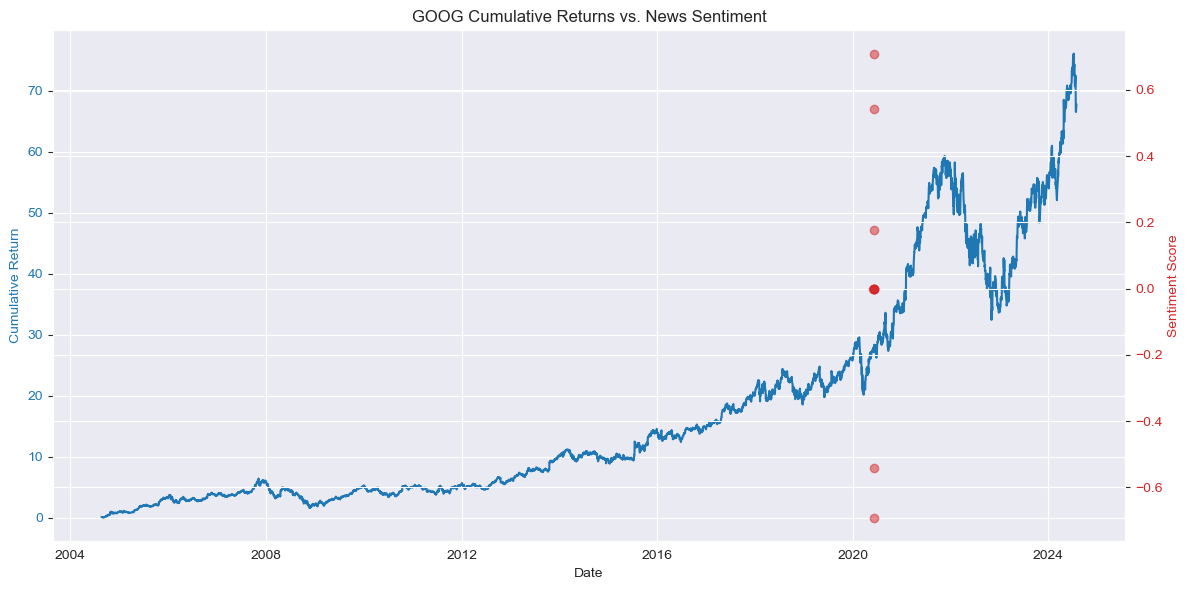


AMZN Correlation between Daily Returns and Sentiment: -0.345


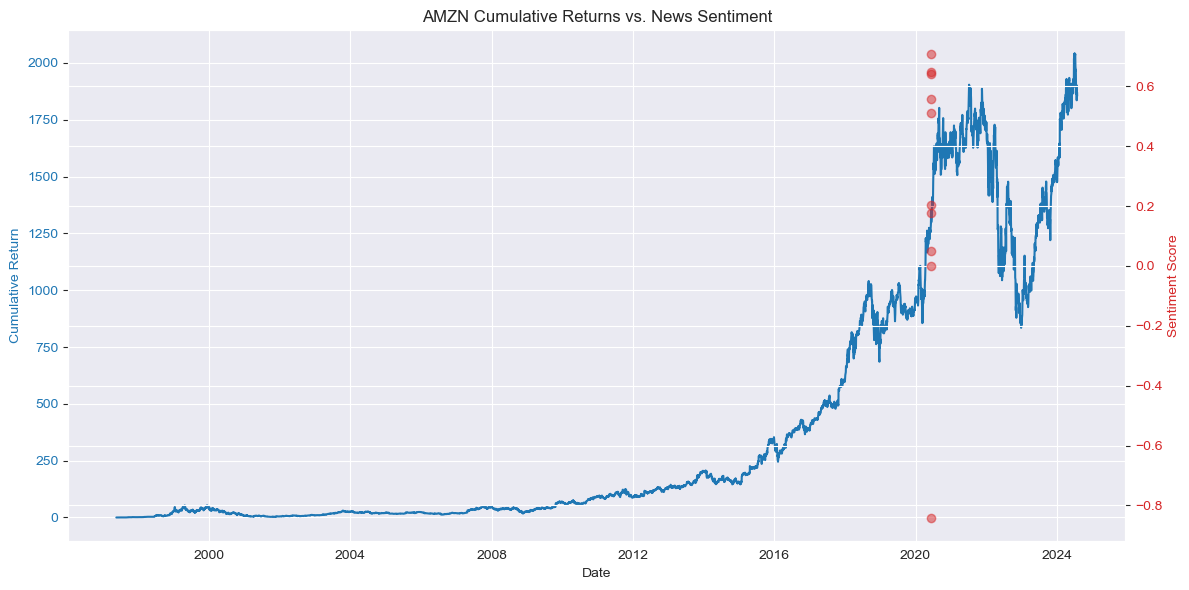


NVDA Correlation between Daily Returns and Sentiment: 0.234


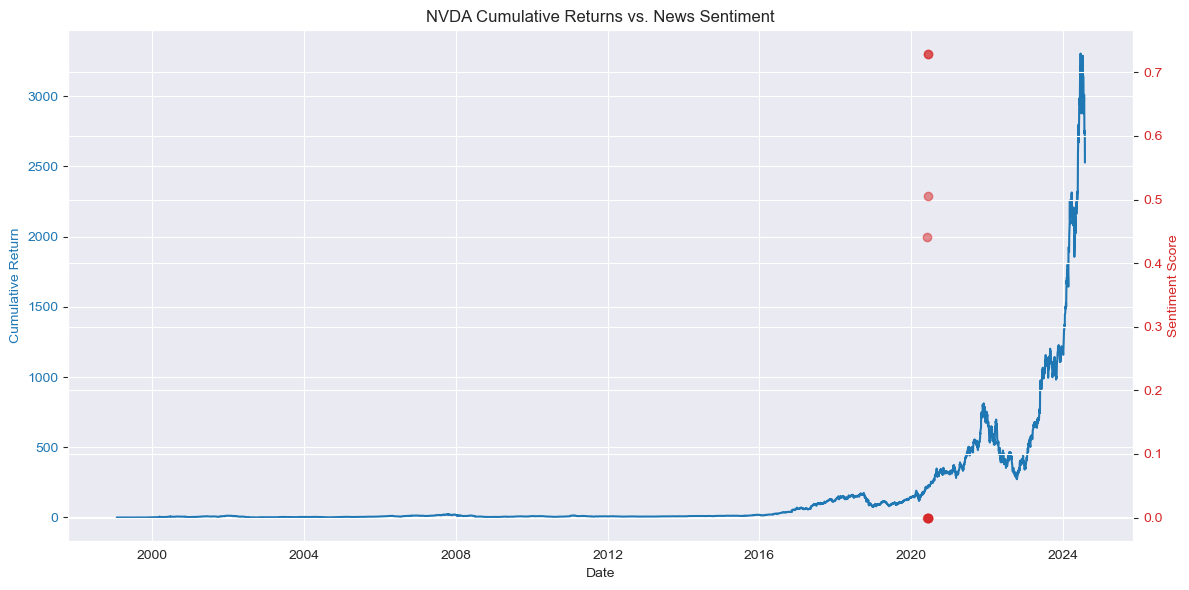


TSLA Correlation between Daily Returns and Sentiment: nan


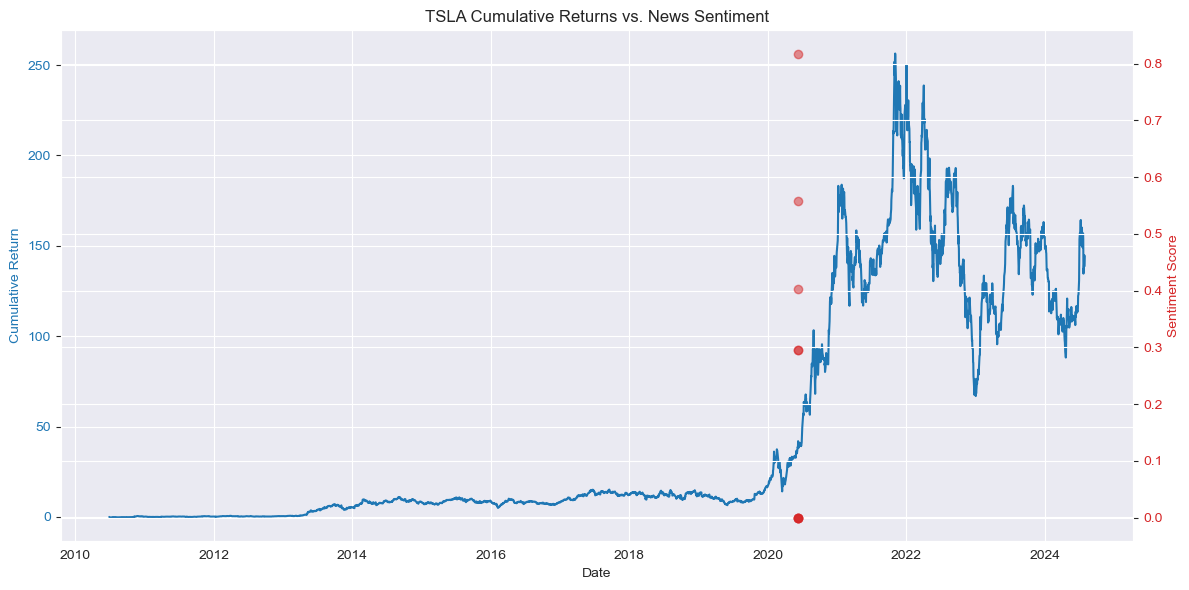


META Correlation between Daily Returns and Sentiment: nan


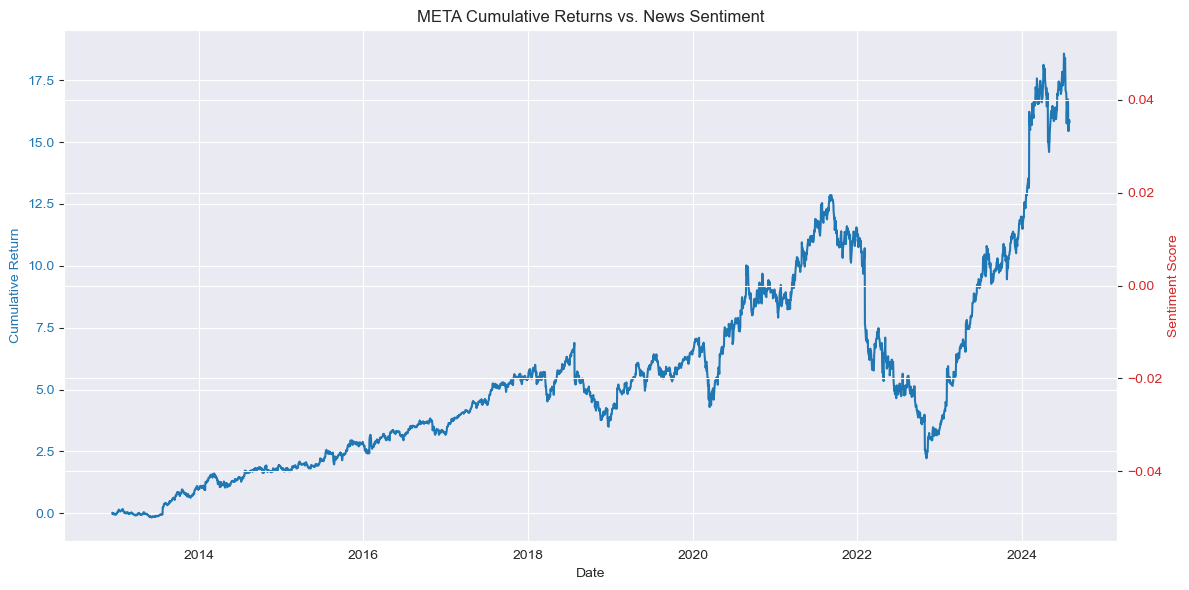

In [7]:
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../src')

from src import DataLoader
from src import FinancialMetrics

try:
    # Initialize components
    yfinance_data_loader = DataLoader()
    financial_metrics = FinancialMetrics()

    # Define tickers
    tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META']



    # Dictionary to store merged results
    merged_results = {}

    for ticker in tickers:
        try:
            # 1. Calculate stock returns
            ticker_stock_data = stock_data[ticker].copy()
            returns_data = financial_metrics.calculate_returns(ticker_stock_data)
      # 2. Drop rows with NaN values
            returns_data.dropna(subset=['Daily_Return', 'Log_Return', 'Cumulative_Return'], inplace=True)

            returns_data['clean_date'] = pd.to_datetime(returns_data['clean_date']).dt.date

            # 2. Get sentiment for this ticker
            ticker_sentiment = ticker_daily_sentiment[
                ticker_daily_sentiment['Ticker'] == ticker
            ].copy()
            ticker_sentiment['clean_date'] = pd.to_datetime(ticker_sentiment['clean_date']).dt.date

            # 3. Merge sentiment with returns
            merged_data = pd.merge(
                returns_data,
                ticker_sentiment,
                on='clean_date',
                how='left'  # Keep all trading days, even without news
            )

            # 4. Store results
            merged_results[ticker] = merged_data

            # 5. Display correlation
            corr = merged_data[['Daily_Return', 'vader_mean']].corr().iloc[0,1]
            print(f"\n{ticker} Correlation between Daily Returns and Sentiment: {corr:.3f}")

            # 6. Plot example visualization
            fig, ax1 = plt.subplots(figsize=(12, 6))

            color = 'tab:blue'
            ax1.set_xlabel('Date')
            ax1.set_ylabel('Cumulative Return', color=color)
            ax1.plot(merged_data['clean_date'],
                    merged_data['Cumulative_Return'],
                    color=color)
            ax1.tick_params(axis='y', labelcolor=color)

            ax2 = ax1.twinx()
            color = 'tab:red'
            ax2.set_ylabel('Sentiment Score', color=color)
            ax2.scatter(merged_data['clean_date'],
                       merged_data['vader_mean'],
                       color=color, alpha=0.5)
            ax2.tick_params(axis='y', labelcolor=color)

            plt.title(f'{ticker} Cumulative Returns vs. News Sentiment')
            fig.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error processing {ticker}: {str(e)}")
            continue

except Exception as e:
    print(f"Pipeline failed: {str(e)}")

###  implementation to calculate Pearson correlation between news sentiment and stock returns:

In [8]:
import sys
from src import  calculate_lagged_correlation
from src import  calculate_correlation

sys.path.append('../../src')


for ticker, data in merged_results.items():
    print(f"\n{ticker} Sentiment-Return Correlations:")
    print(calculate_correlation(data))
    print(calculate_lagged_correlation(data))



AAPL Sentiment-Return Correlations:
               Pearson_Correlation  Absolute_Correlation Strength
textblob_mean            -0.212995              0.212995     Weak
positive_pct             -0.166667              0.166667     Weak
vader_mean                0.103438              0.103438     Weak
vader_median              0.103438              0.103438     Weak
negative_pct                   NaN                   NaN     Weak
   Lag_Days  Pearson_Correlation  Absolute_Correlation Direction
1         1            -0.443542              0.443542  Negative
2         2             0.260966              0.260966  Positive
0         0             0.103438              0.103438  Positive
3         3             0.032658              0.032658  Positive

MSFT Sentiment-Return Correlations:
               Pearson_Correlation  Absolute_Correlation Strength
vader_mean                     NaN                   NaN     Weak
vader_median                   NaN                   NaN     Weak
textblo

In [9]:
import sys
from src import  calculate_lagged_correlation


sys.path.append('../../src')


for ticker, data in merged_results.items():
    print(f"\n{ticker} Sentiment-Return Correlations:")

    print(calculate_lagged_correlation(data))



AAPL Sentiment-Return Correlations:
   Lag_Days  Pearson_Correlation  Absolute_Correlation Direction
1         1            -0.443542              0.443542  Negative
2         2             0.260966              0.260966  Positive
0         0             0.103438              0.103438  Positive
3         3             0.032658              0.032658  Positive

MSFT Sentiment-Return Correlations:
   Lag_Days  Pearson_Correlation  Absolute_Correlation Direction
0         0                  NaN                   NaN  Negative
1         1                  NaN                   NaN  Negative
2         2                  NaN                   NaN  Negative
3         3                  NaN                   NaN  Negative

GOOG Sentiment-Return Correlations:
   Lag_Days  Pearson_Correlation  Absolute_Correlation Direction
3         3            -0.541586              0.541586  Negative
0         0            -0.392376              0.392376  Negative
2         2            -0.217226            

### Combined Heatmap Visualization

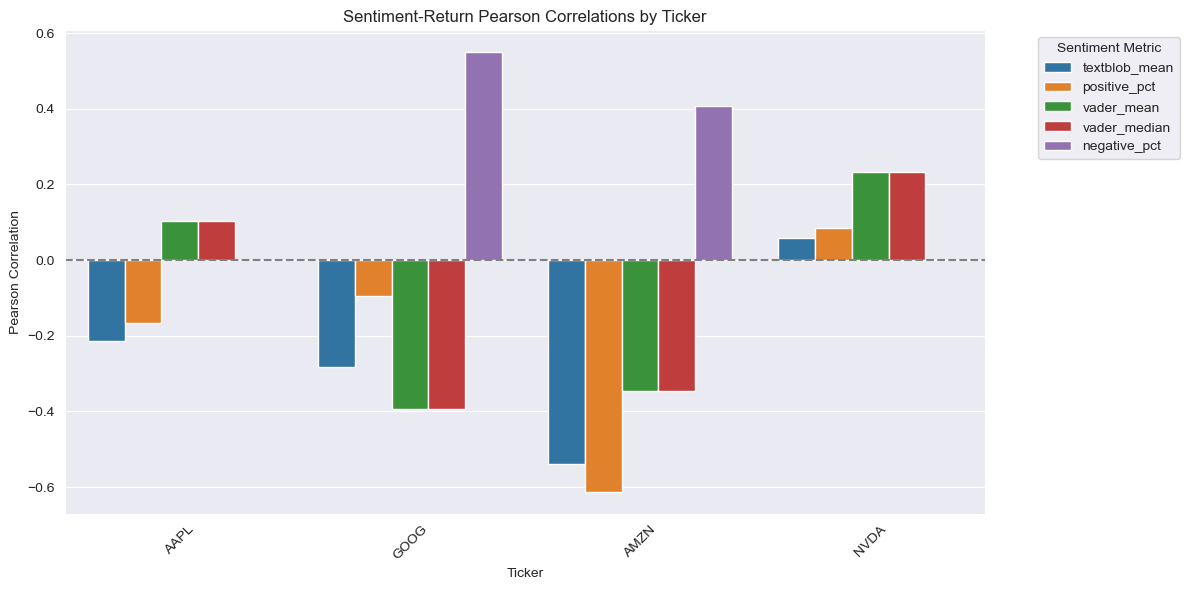

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

all_results = []

for ticker, data in merged_results.items():
    corr_df = calculate_correlation(data)
    corr_df = corr_df.reset_index().rename(columns={'index': 'Sentiment_Metric'})
    corr_df['Ticker'] = ticker
    all_results.append(corr_df)

# Combine all tickers results
combined_df = pd.concat(all_results, ignore_index=True)

# Optional: drop NaNs if any
combined_df = combined_df.dropna(subset=['Pearson_Correlation'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df,
            x='Ticker',
            y='Pearson_Correlation',
            hue='Sentiment_Metric',
            palette='tab10')

plt.axhline(0, color='gray', linestyle='--')
plt.title('Sentiment-Return Pearson Correlations by Ticker')
plt.ylabel('Pearson Correlation')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
